# Ridge/Lasso in Python

Run a 5-fold cross validation. For the sweep of the regularization parameter, use [0.00001,0.0001,0.001,0.005,0.01,0.05,0.1] for ridge and [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.2,0.3,0.4,0.5] for lasso.

In [10]:
import pandas as pd
import numpy as np 
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import mean_squared_error

In [11]:
bosDer_train = pd.read_csv('bostonderived_train.csv')
bosDer_test = pd.read_csv('bostonderived_test.csv')
bosDer_folds = pd.read_csv('bostonderived_folds.csv',header = False)

In [12]:
x_train = bosDer_train[['lstat','rm','chas','indus','tax','rad','black']]
y_train = bosDer_train['medv']
x_test = bosDer_test[['lstat','rm','chas','indus','tax','rad','black']]
y_test = bosDer_test['medv']

In [13]:
bosDer_folds.index = bosDer_folds.index + 1 
bosDer_folds.columns  = ['folds']
bosDer_folds.loc[0] = 1
bosDer_folds = bosDer_folds.sort()

In [14]:
validation = bosDer_folds['folds'] == 0
train = ~validation
x_train_0 = x_train[train]
x_valid_0 = x_train[validation]
y_train_0 = y_train[train]
y_valid_0 = y_train[validation]

In [15]:
validation = bosDer_folds['folds'] == 1
train = ~validation
x_train_1 = x_train[train]
x_valid_1 = x_train[validation]
y_train_1 = y_train[train]
y_valid_1 = y_train[validation]

In [16]:
validation = bosDer_folds['folds'] == 2
train = ~validation
x_train_2 = x_train[train]
x_valid_2 = x_train[validation]
y_train_2 = y_train[train]
y_valid_2 = y_train[validation]

In [17]:
validation = bosDer_folds['folds'] == 3
train = ~validation
x_train_3 = x_train[train]
x_valid_3 = x_train[validation]
y_train_3 = y_train[train]
y_valid_3 = y_train[validation]

In [18]:
validation = bosDer_folds['folds'] == 4
train = ~validation
x_train_4 = x_train[train]
x_valid_4 = x_train[validation]
y_train_4 = y_train[train]
y_valid_4 = y_train[validation]

In [19]:
x_training_list = [x_train_0,x_train_1,x_train_2,x_train_3,x_train_4]
x_validation_list = [x_valid_0,x_valid_1,x_valid_2,x_valid_3,x_valid_4]
y_training_list = [y_train_0,y_train_1,y_train_2,y_train_3,y_train_4]
y_validation_list = [y_valid_0,y_valid_1,y_valid_2,y_valid_3,y_valid_4]

In [20]:
ridge_alpha = [0.00001, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1,1,10,100,1000,10000]
lasso_alpha = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

In [21]:
ridge_mse_alpha = []
for alpha in ridge_alpha:
    print alpha
    r_mse = []
    for i in range(5):
        xtrain = x_training_list[i]
        xvalid = x_validation_list[i]
        ytrain = y_training_list[i]
        yvalid = y_validation_list[i]
        model = Ridge(alpha = alpha)
        predict = model.fit(xtrain,ytrain).predict(xvalid)
        mse_param = mean_squared_error(yvalid,predict)
        r_mse.append(mse_param)
    print np.mean(r_mse)
    ridge_mse_alpha.append(np.mean(r_mse))

1e-05
31.2435601653
0.0001
31.2435552626
0.001
31.2435062407
0.005
31.2432884693
0.01
31.2430164938
0.05
31.2408502064
0.1
31.2381659776
1
31.1940432727
10
31.0113788648
100
32.6166520267
1000
37.3148970393
10000
43.9708474401


In [24]:
lasso_mse_alpha = []
for alpha in lasso_alpha:
    print alpha
    l_mse = []
    for i in range(5):
        xtrain = x_training_list[i]
        xvalid = x_validation_list[i]
        ytrain = y_training_list[i]
        yvalid = y_validation_list[i]
        model = Lasso(alpha = alpha)
        predict = model.fit(xtrain,ytrain).predict(xvalid)
        mse_param = mean_squared_error(yvalid,predict)
        l_mse.append(mse_param)
    print np.mean(l_mse)
    lasso_mse_alpha.append(np.mean(l_mse))

0.0001
31.2435226933
0.0005
31.2433750833
0.001
31.2432006274
0.005
31.2422069452
0.01
31.2419696764
0.05
31.2802705912
0.1
31.31352683
0.2
31.3352774583
0.3
31.4618345123
0.4
31.6413984545
0.5
31.8786546265


Report the best parameter chosen based on cross-validation. 

In [25]:
print "Best Parameter for Ridge:"    
print ridge_alpha[ridge_mse_alpha.index(np.min(ridge_mse_alpha))]
print "Best Parameter for Lasso"
print lasso_alpha[lasso_mse_alpha.index(np.min(lasso_mse_alpha))]

Best Parameter for Ridge:
10
Best Parameter for Lasso
0.01


Run ridge and lasso for all of the parameters speciﬁed above, and plot the coeﬃcients learned for each of them

Ridge Regression


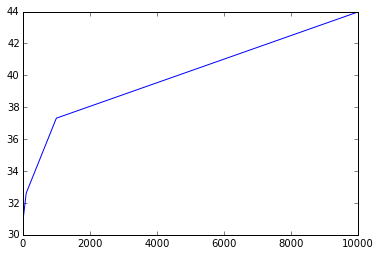

In [28]:
print 'Ridge Regression'
plt.plot(ridge_alpha,ridge_mse_alpha)

Lasso Regression


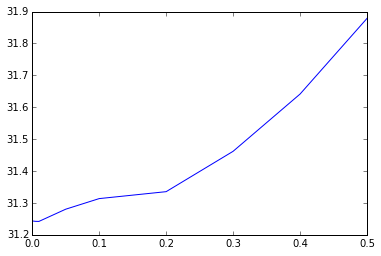

In [30]:
print 'Lasso Regression'
plt.plot(lasso_alpha,lasso_mse_alpha)

As the value of the regularization parameter increases the mse for ridge regression increases steeply from 100 until 1,000 after which the rate of increase declines, and the mse for lasso regression increases gradually initially then increases at a larger rate when the parameter is greater than 0.2.

Run least squares regression, ridge, and lasso on the full training data. For ridge and lasso, use only the best regularization parameter selected above. Report the prediction error on the test data for each.

In [32]:
model = LinearRegression()
predict = model.fit(x_train,y_train).predict(x_test)
mlr_mse = mean_squared_error(y_test,predict)
print 'Multiple Linear Regression Prediction Error on Test Data: ' + str(mlr_mse)

model = Ridge(alpha = 10)
predict = model.fit(x_train,y_train).predict(x_test)
ridge_mse = mean_squared_error(y_test,predict)
print 'Ridge Regression Prediction Error on Test Data: ' + str(ridge_mse)

model = Lasso(alpha = 0.01)
lasso = model.fit(x_train,y_train)
predict = model.fit(x_train,y_train).predict(x_test)
lasso_mse = mean_squared_error(y_test,predict)
print 'Lasso Regression Prediction Error on Test Data: ' + str(lasso_mse)

Multiple Linear Regression Prediction Error on Test Data: 24.8310760554
Ridge Regression Prediction Error on Test Data: 25.1117495579
Lasso Regression Prediction Error on Test Data: 24.8756410098


For the best lasso parameter, determine the variables that were not dropped. Using only these variables, run least squares regression on full training data and report the prediction error on the test data.

In [33]:
used_lasso_features = x_train.columns.values[np.nonzero(lasso.coef_)]
print 'Features used in Lasso Regression: '
print used_lasso_features
model = LinearRegression()
predict = model.fit(x_train[used_lasso_features],y_train).predict(x_test[used_lasso_features])
mlr_lasso_features_mse = mean_squared_error(y_test,predict)
print 'Multiple Linear Regression with Lasso Features Prediction Error on Test Data: ' + str(mlr_lasso_features_mse)

Features used in Lasso Regression: 
['lstat' 'rm' 'chas' 'indus' 'tax' 'rad' 'black']
Multiple Linear Regression with Lasso Features Prediction Error on Test Data: 24.8310760554


Compare the variables that were dropped by lasso to the ones you dropped in the last homework by examining the p-values. Are they the same?

In [34]:
print x_train.columns.values
print used_lasso_features

['lstat' 'rm' 'chas' 'indus' 'tax' 'rad' 'black']
['lstat' 'rm' 'chas' 'indus' 'tax' 'rad' 'black']


Features Dropped by Lasso: None
Features Dropped by P-values in HW1: INDUS & RAD
Using the best parameter (0.01), lasso regression did not drop any variables, thus, the error in part (d) is the same as the error for MLR in part (c).